# Домашнее задание "Центральная Предельная Теорема и Закон Больших Чисел".

## Задание.

В этом задании нужно убедиться, что ЦПТ действительно работает.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Создайте случайную величину из любого выбранного вами распределения, для разных значений n сгенерируйте 1000 выборок размера n и постройте гистрограммы средних этих выборок.

In [44]:
# rv = ### YOUR CODE HERE
a=2
rv = sts.gamma(a) 
sample = rv.rvs(size=1000)

Для выполнения задания я взяла гамма-распределение. Оно достаточно несимметричное, со скосом влево и длинным хвостом справа, поэтому интуиция такая, что нам потребуются выборки достаточно большого размера, чтобы распределение выборочных средних походило на нормальное

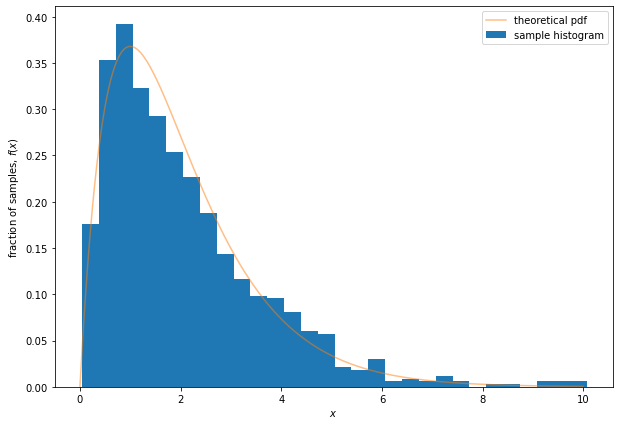

In [39]:
# x = np.linspace(0,2,100)
x = np.linspace(0,10,1000)
pdf = rv.pdf(x)
plt.figure(figsize=(10,7))
plt.hist(sample, density=True, bins=30, label='sample histogram')
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('fraction of samples, $f(x)$')
plt.xlabel('$x$')
plt.show()

In [46]:
mean, var, skew, kurt = sts.gamma.stats(a, moments='mvsk')
print(f'mean = {mean}\nvariance = {var}')

mean = 2.0
variance = 2.0


Тестовый запуск. Делаем выборки размера n=2. В итоге получаем распределение больше похожее на исходное, нежели на нормальное распределение.

In [35]:
# Параметры запуска: размеры выборок и количество повторов генерации
n1 = 2
samples_count = 1000
a1 = np.array([])

for number in range(samples_count):
    sample1 = rv.rvs(size=n1)
    a1 = np.append(a1, sample1.mean())


Text(0.5, 0, '$x$')

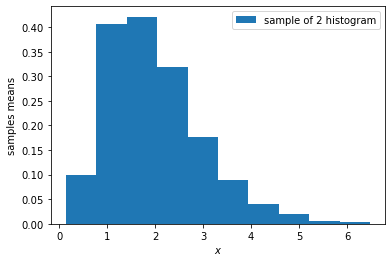

In [36]:
# Строим графики
# Подписи для графиков
label_1 = 'sample of ' + str(n1) + ' histogram'
plt.hist(a1, density=True, label=label_1)

plt.legend()
plt.ylabel('samples means')
plt.xlabel('$x$')

Будем увеличивать размеры выборки. Ожидаем, что при достаточно больших размерах выборки n увидим нормальное распределение, с параметрами (2.0, 2.0/n), где 2.0 - мат. ожидание исходного распределения, 2.0/n - дисперсия исходного распределения, деленная на размер выборки 

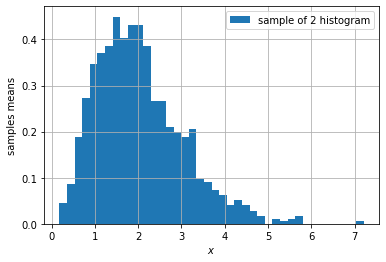

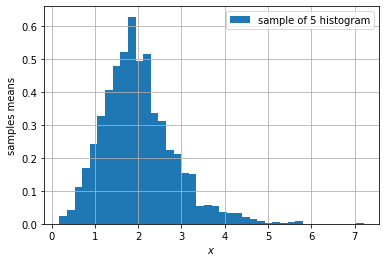

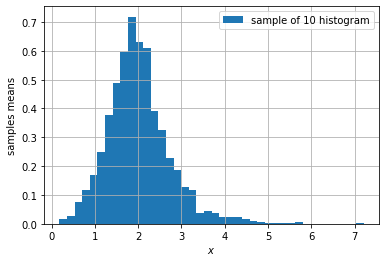

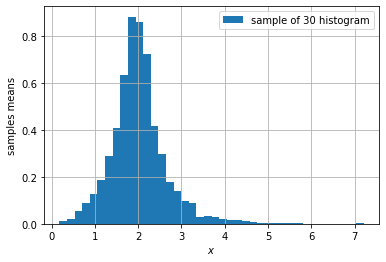

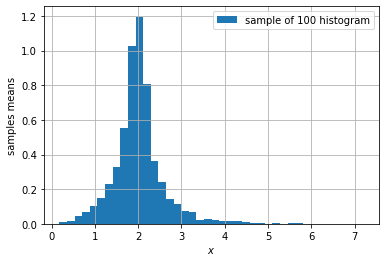

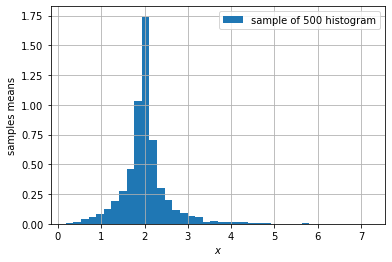

In [48]:
# Параметры запуска: размеры выборок и количество повторов генерации
n_list = [2, 5, 10, 30, 100, 500]

samples_count = 1000
a1 = np.array([])
for n in n_list:
    for number in range(samples_count):
        sample1 = rv.rvs(size=n)
        a1 = np.append(a1, sample1.mean())

    label_1 = 'sample of ' + str(n) + ' histogram'
    plt.hist(a1, density=True, label=label_1, bins=40)
    plt.legend()
    plt.ylabel('samples means')
    plt.xlabel('$x$')
    plt.grid()
    plt.show()

Можно сказать, что исходная интуиция подтвердилась. Действительно, с увеличением n мы получаем все более симметричное и узкое распределение, похожее на нормальное, с центром в точке x = 2